<p style="font-family:Times New Roman; font-size:27px;font-weight:bold; color:darkred;">
📘 Retail Sales Performance Analysis </p>
<p style="font-family:Times New Roman; font-size:24px;font-weight:bold; color:darkred;">
    (Final Bootcamp Project – EDA & Customer Behavior & Revenue Insights)
</p>
<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">
📝 Project Introduction
</p>
<p style="font-family:Times New Roman; font-size:18px">
This project analyzes retail transactional data to uncover sales patterns, customer behavior, and revenue drivers.  
The goal is to support data-driven decision-making for sales optimization, inventory planning, and business growth.
</p>
<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">
📌 Project Motivation
</p>
<p style="font-family:Times New Roman; font-size:18px">
Retail companies generate large volumes of transactional data every day. However, without proper analysis, it is difficult to understand which customers, products, and time periods truly drive business performance.
<br>
<br>
This project aims to transform raw transaction data into actionable insights that can help decision-makers improve sales strategies, optimize inventory management, and better understand customer purchasing behavior.
<br>
<br>
<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">
🎯 Project Objectives
</p>
<ul style="font-family:Times New Roman; font-size:18px; list-style-type:square;">
 <li>Identify key revenue drivers in retail transactions</li>
 <li>Understand customer purchasing behavior</li>
 <li>Analyze temporal sales patterns (daily, weekly, monthly)</li>
 <li>Support strategic decision-making through data-driven insights</li>
 </ul>

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
pd.set_option("display.max_columns", None)
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
# Data import 
df = pd.read_csv("../Data/Retail_Transactions.csv")

# View the data
df.head()


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,Male,High,Premium,05-08-23,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,Male,Low,Premium,01-10-24,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [4]:
# Basic information, Exploring my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [5]:
# Describe the data - Descriptive statistics.
df.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.016770e+05,301702.000000,3.016480e+05,301670.000000,301837.000000,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,55006.553934,5.501464e+09,50298.951019,35.481326,2023.165113,5.359729,255.163659,1367.651156,3.162670
std,2.595565e+06,26005.675200,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32469.250000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,55012.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77511.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


In [59]:
# Dataset Shape
df.shape

(302010, 30)

In [30]:
# Numbers of unique values in each columns
df.nunique()

Transaction_ID      294461
Customer_ID          86766
Name                159390
Email                52897
Phone               299295
Address             299329
City                   130
State                   54
Zipcode              93978
Country                  5
Age                     53
Gender                   2
Income                   3
Customer_Segment         3
Date                   366
Year                     2
Month                   12
Time                 83677
Total_Purchases         10
Amount              299297
Total_Amount        299305
Product_Category         5
Product_Brand           18
Product_Type            33
Feedback                 4
Shipping_Method          3
Payment_Method           4
Order_Status             4
Ratings                  5
products               318
dtype: int64

In [6]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

Name                382
Phone               362
Total_Purchases     361
Date                359
Amount              357
Year                350
Time                350
Total_Amount        350
Email               347
Zipcode             340
Shipping_Method     337
Transaction_ID      333
Gender              317
Address             315
Customer_ID         308
Payment_Method      297
Income              290
Product_Category    283
State               281
Product_Brand       281
Month               273
Country             271
City                248
Order_Status        235
Customer_Segment    215
Ratings             184
Feedback            184
Age                 173
Product_Type          0
products              0
dtype: int64


<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">
Data Quality Check & Handling Missing Values
</p>

<p style="font-family:Times New Roman; font-size:18px; list-style-type:square;">
The dataset contains a very small proportion of missing values relative to its size.
Given the large number of observations (over 300,000 transactions), the impact of missing data is negligible.
<br>
<br>
A minimal and practical data cleaning approach is applied to preserve the full analytical power of the dataset.</p>


In [7]:
# Count rows with at least one null value
rows_with_nulls = df.isnull().any(axis=1).sum()

# Length of the Dataframe
total_rows = len(df)

# Calculate percentage of rows with nulls
percentage_null_rows = (rows_with_nulls / total_rows) * 100

print("Percentage of rows with null values:", percentage_null_rows, "%")

Percentage of rows with null values: 2.6816992814807454 %


In [8]:
# Drop missing values
df = df.dropna()
df.isna().sum()

Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64

In [9]:
# Find the duplicates and drop them
df.duplicated().sum()
df = df.drop_duplicates()

In [10]:
# Convert columns to appropriate data types
df['Year'] = df['Year'].astype('int64')
df['Total_Purchases'] = df['Total_Purchases'].astype('int64')
df['Ratings'] = df['Ratings'].astype('int64')
df['Zipcode'] = df['Zipcode'].astype('object') 
df['Phone'] = df['Phone'].astype('object')
df['Transaction_ID'] = df['Transaction_ID'].astype('int64')
df['Customer_ID'] = df['Customer_ID'].astype('int64')


In [11]:
# Function to standardize date formats
def standardize_date_column(date_series):
    # First try parsing with the '-' format
    dates_with_dash = pd.to_datetime(date_series, format='%m-%d-%y', errors='coerce')
    
    # For dates that could not be parsed, try the '/' format
    dates_with_slash = pd.to_datetime(date_series, format='%m/%d/%Y', errors='coerce')
    
    # Combine the results, prioritizing dates parsed with the first format
    return dates_with_dash.fillna(dates_with_slash)

# Apply the vectorized function to the 'Date' column
df['Date'] = standardize_date_column(df['Date'])



<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">
Feature Engineering
</p>

<p style="font-family:Times New Roman; font-size:18px; list-style-type:square;">
To enhance our analysis and support business questions, we will create new features from existing columns.  
<br>
<br>
These features will help in segmenting transactions, analyzing trends over time, and grouping customers.</p>


In [12]:
# Create Date and Time related Columns

# Extract Year, Month, Weekday
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()  # Monday, Tuesday, ...

# Create Time Periods based on Hour (if Time column exists)
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour
def categorize_time(hour):
    if   6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['Time_Period'] = df['Time'].apply(categorize_time)

In [13]:
# Create Customer and Transaction Metrics
# Total spend per customer
df['Total_Spend'] = df.groupby('Customer_ID')['Amount'].transform('sum')

# Total transactions per customer
df['Total_Transactions'] = df.groupby('Customer_ID')['Transaction_ID'].transform('count')

# Average order value
df['Avg_Order_Value'] = df['Total_Spend'] / df['Total_Transactions']

In [14]:
# Total revenue
total_revenue = df['Amount'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $74,991,765.04


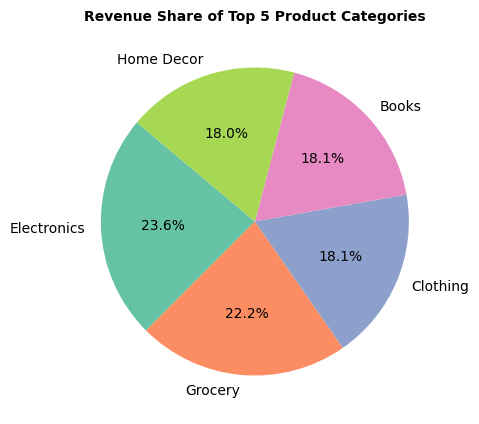

In [16]:
# Revenue share by top categories - Pie Chart
plt.figure(figsize=(5,5))
top_cat_share = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(5)
plt.pie(top_cat_share, labels=top_cat_share.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('Set2')[0:5])
plt.title('Revenue Share of Top 5 Product Categories',fontsize=10,fontdict={'fontweight':'bold'})
plt.show()

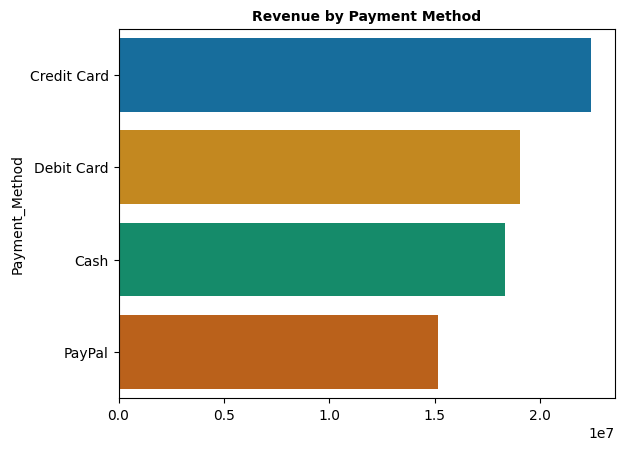

In [17]:
# Revenue by Payment Method - Bar Plot
payment_rev = df.groupby('Payment_Method')['Amount'].sum().sort_values(ascending=False)
sns.barplot(x=payment_rev.values, y=payment_rev.index,palette='colorblind')
plt.title('Revenue by Payment Method',fontsize=10,fontdict={'fontweight':'bold'})
plt.show()

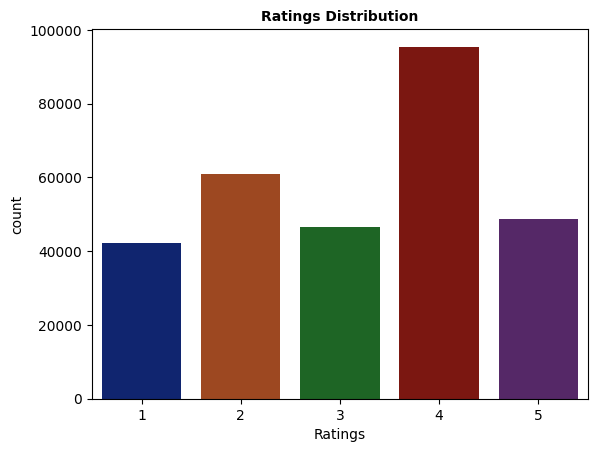

In [18]:
# Ratings Distribution - Count Plot
sns.countplot(x='Ratings', data=df,palette='dark')
plt.title('Ratings Distribution',fontsize=10,fontdict={'fontweight':'bold'})
plt.show()

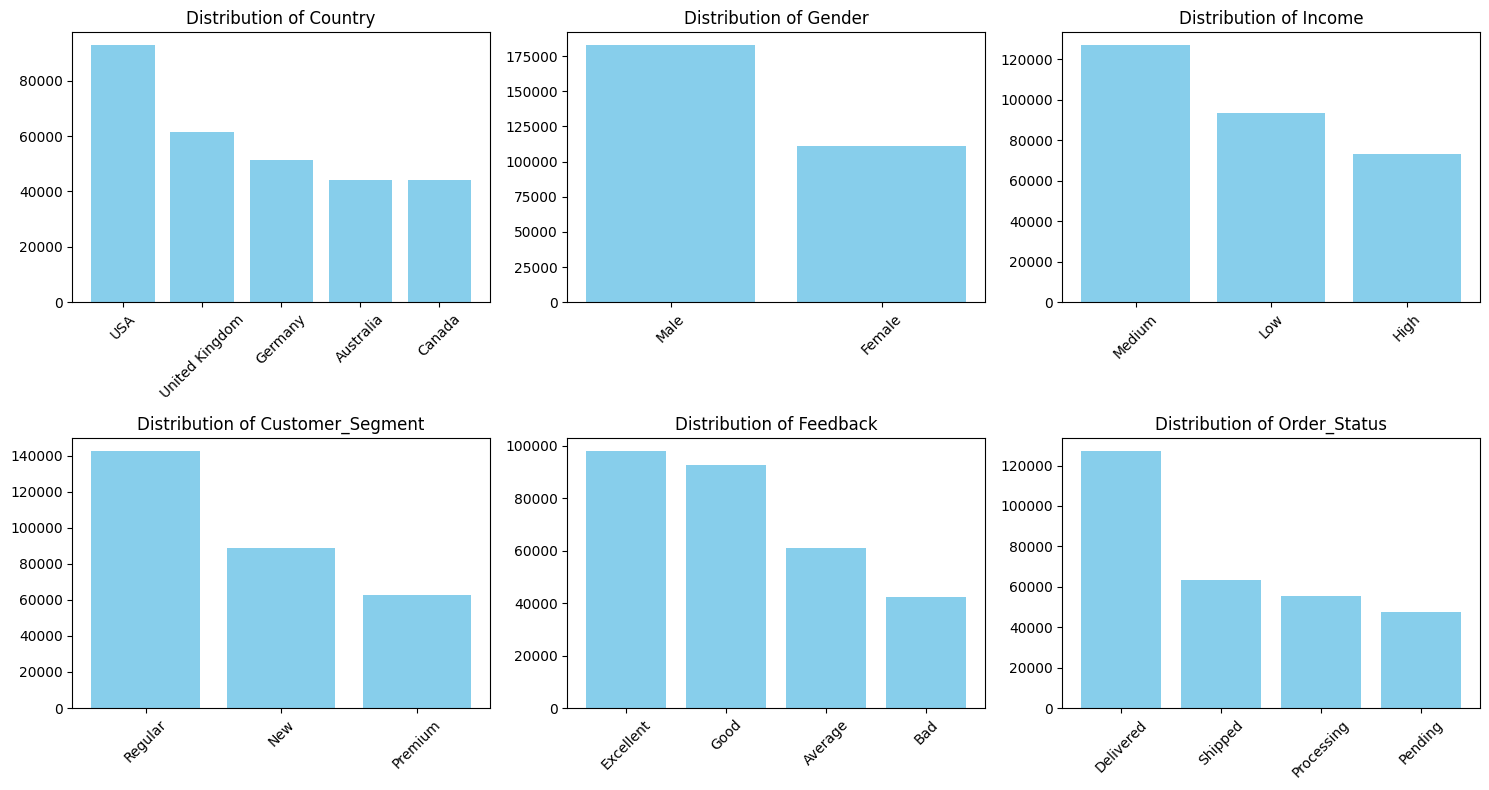

In [73]:
# Select categorical columns
categorical_columns = ['Country', 'Gender', 'Income', 'Customer_Segment', 
                        'Feedback','Order_Status']

# Set the size of the plots
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, (len(categorical_columns) + 1) // 2, i)  # Create subplots
    value_counts = df[col].value_counts()  # Get value counts for each column
    plt.bar(value_counts.index, value_counts.values, color='skyblue')  # Create bar plot
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

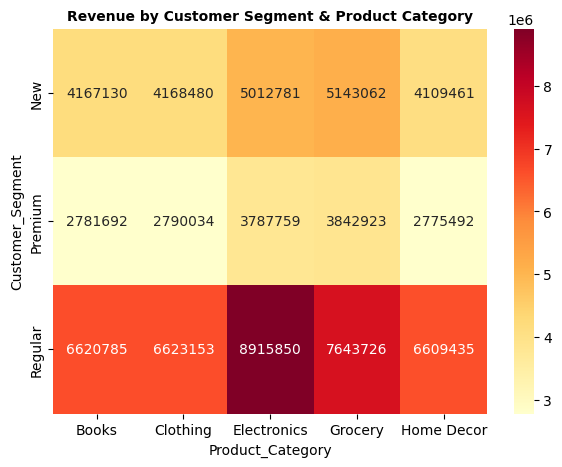

In [19]:
# Revenue by Customer Segment & Product Category - Heatmap
segment_category = df.pivot_table(values='Amount', index='Customer_Segment', columns='Product_Category', aggfunc='sum')
plt.figure(figsize=(7,5))
sns.heatmap(segment_category, cmap='YlOrRd', annot=True, fmt=".0f")
plt.title('Revenue by Customer Segment & Product Category',fontsize=10,fontdict={'fontweight':'bold'})
plt.show()

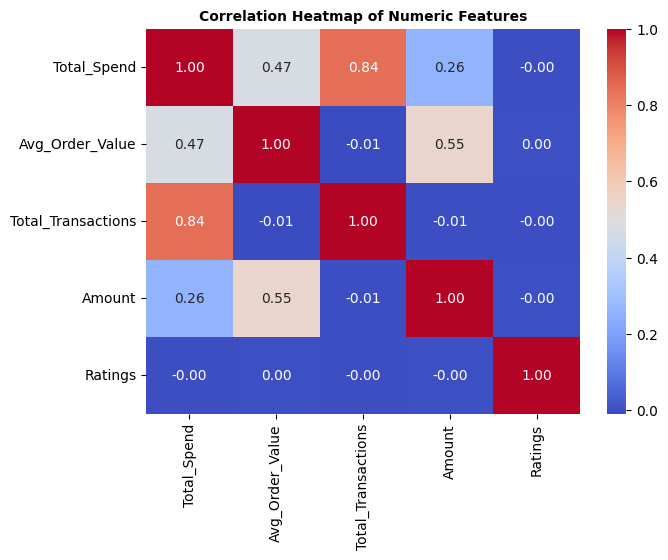

In [24]:
# Correlation matrix
corr = df[['Total_Spend', 'Avg_Order_Value', 'Total_Transactions', 'Amount', 'Ratings']].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features',fontsize=10,fontdict={'fontweight':'bold'})
plt.show()

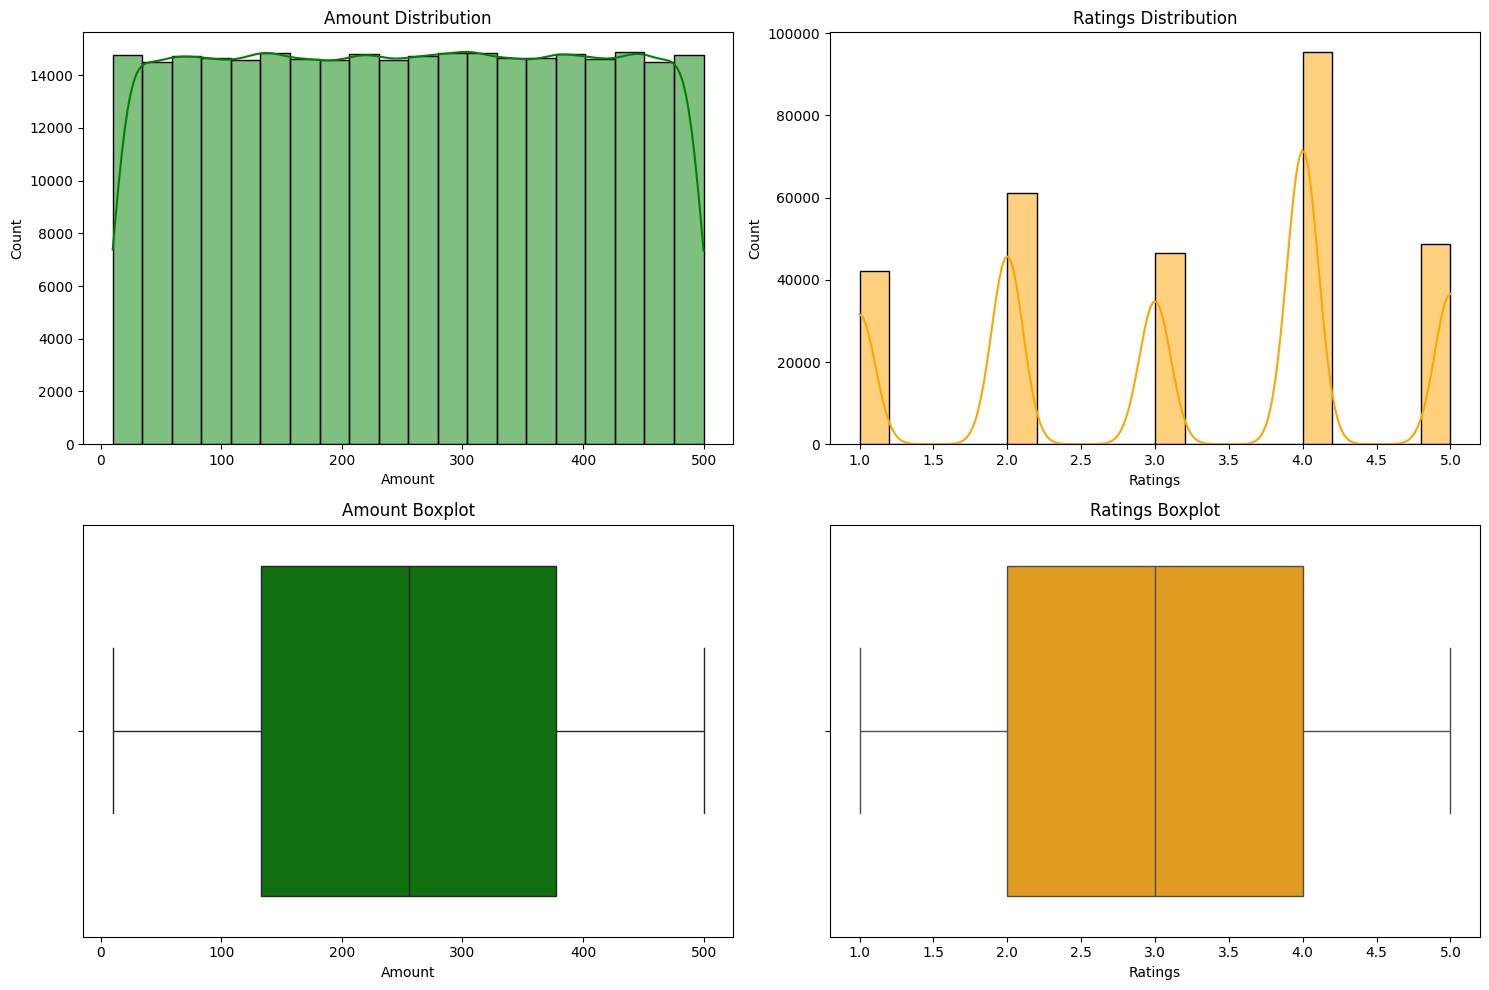

In [101]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Distribution plots
sns.histplot(df['Amount'], bins=20, kde=True, ax=axs[0, 0],color='green')
axs[0, 0].set_title('Amount Distribution')

sns.histplot(df['Ratings'], bins=20, kde=True, ax=axs[0, 1],color='orange')
axs[0, 1].set_title('Ratings Distribution')

# Boxplots
sns.boxplot(x=df['Amount'], ax=axs[1, 0],color='green')
axs[1, 0].set_title('Amount Boxplot')

sns.boxplot(x=df['Ratings'], ax=axs[1, 1],color='orange')
axs[1, 1].set_title('Ratings Boxplot')

# Adjust layout
plt.tight_layout()
plt.show()

In [67]:
df['Country'].unique()

array(['Germany', 'United Kingdom', 'Australia', 'Canada', 'USA'],
      dtype=object)

In [68]:
# Map Visualization of Revenue by Country

# Aggregate revenue by Country
country_revenue = df.groupby('Country')['Amount'].sum().reset_index()

# Map of Europe revenue by country
fig = px.choropleth(country_revenue,
                    locations='Country',  
                    locationmode='country names',  # 'ISO-3' هم میشه
                    color='Amount',
                    hover_name='Country',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Revenue by Country')
fig.show()

<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">
From Data to Business Questions
</p>

<p style="font-family:Times New Roman; font-size:18px;">
After preparing the data, the next step is to align the analysis with stakeholder needs.<br>
Based on the responsibilities of the digital marketing team, we define key business questions
and formulate hypotheses <br> to guide the exploratory analysis.</p>

<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">
Business Context and Stakeholder Overview </p>
<p style="font-family:Times New Roman; font-size:18px;">
The primary stakeholder of this project is the <strong>Head of Sales & Business Analytics</strong> at a mid-sized retail company operating in Germany.
<br>
<br>
This stakeholder is responsible for revenue growth, product performance monitoring, and sales planning. They rely on data insights to optimize business decisions related to customers, products, and timing of promotions.
<br>
<br>


<p style="font-family:Times New Roman; font-size:18px;font-weight:bold; color:darkred;">Stakeholder Needs:</p>
<ul style="font-family:Times New Roman; font-size:18px; list-style-type:square;">
 <li>Identify high-value customers and segment them for targeted marketing campaigns.</li>
 <li>Understand revenue drivers, including top-performing products and categories.</li>
 <li>Detect sales trends, seasonality, and peak periods for promotions.</li>
 <li>Optimize pricing strategies and inventory planning using data-driven insights.</li>
 <li>Monitor customer satisfaction via ratings and feedback to improve retention.</li>
 </ul></p>

>



<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">Business Questions and Hypotheses </p>

<p style="font-family:Times New Roman; font-size:18px;">
Based on the stakeholder’s objectives, the following business questions and hypotheses are defined.
<br>
<br>
<strong>BQ1</strong>:  Do frequent customers generate more revenue than occasional buyers?
<br>
<br>
<strong>BQ2</strong>: Do a small group of high-spending customers contribute disproportionately to the total revenue?
<br>
<br>
<strong>BQ3</strong>: Which customer age groups contribute most to total revenue?
<br>
<br>
To address these questions, the following hypotheses are tested:
<br>
<br>
<strong>Hypothesis 1</strong>: Customers with higher purchase frequency generate significantly higher total spend.
<br>
<br>
<strong>Hypothesis 2</strong>: A minority of customers generate a majority of the total revenue, indicating that focusing on high-value customers could significantly boost overall business performance.
<br>
<br>
<strong>Hypothesis 3</strong>: Younger customer segments contribute a disproportionately higher share of total revenue
<br>
<br>

   


<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">Analysis of Hypothesis 1 </p>

<p style="font-family:Times New Roman; font-size:18px;">
Customers with higher purchase frequency generate significantly higher total spend
</p>

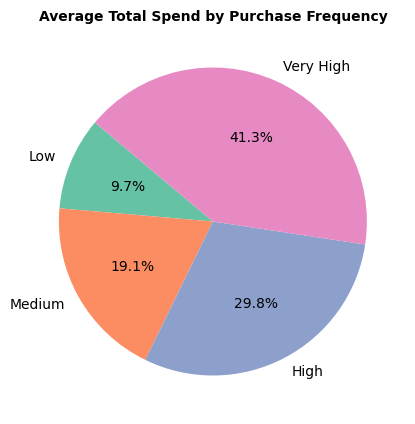

In [114]:
# Purchase Frequency Analysis

freq_rev = df.groupby('Frequency_Group')['Total_Spend'].mean()

plt.figure(figsize=(5,5))
plt.pie(freq_rev, labels=freq_rev.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('Set2')[0:4])
plt.title('Average Total Spend by Purchase Frequency', fontsize=10, fontdict={'fontweight':'bold'})
plt.show()



<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">Interpretation of Hypothesis 1 </p>

<p style="font-family:Times New Roman; font-size:18px;">
The analysis indicates a strong relationship between purchase frequency and total customer spending.
<br>
<br>
High and very high frequency customers generate substantially more revenue compared to low-frequency buyers.
<br>
<br>
This pattern highlights the critical role of customer loyalty in driving overall business performance.
</p>

<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">Business Insight of Hypothesis 1 </p>

<p style="font-family:Times New Roman; font-size:18px;">
Revenue generation is strongly driven by younger customer segments.
<br>
<br>
These customers exhibit higher purchasing activity and contribute a larger share of total revenue compared to older age groups.
<br>
<br>
Targeted engagement of these segments can significantly improve marketing efficiency and revenue growth.
</p>

<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">Analysis of Hypothesis 2 </p>

<p style="font-family:Times New Roman; font-size:18px;">
A minority of customers generate a majority of the total revenue, indicating that focusing on high-value customers could significantly boost overall business performance.

</p>

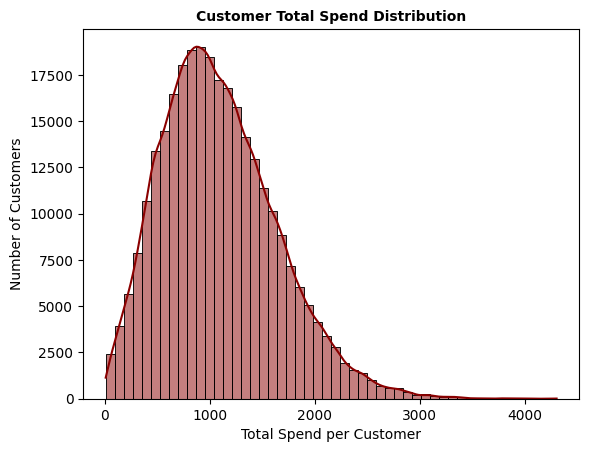

In [134]:
# Visualization of Total Spend per customer
sns.histplot(df['Total_Spend'], bins=50, kde=True,color='darkred')
plt.title('Customer Total Spend Distribution',fontsize=10,fontdict={'fontweight':'bold'}) 
plt.xlabel('Total Spend per Customer') 
plt.ylabel('Number of Customers') 
plt.show()

<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">Interpretation of Hypothesis 2 </p>

<p style="font-family:Times New Roman; font-size:18px;">
Histogram shows most customers have relatively low total spend, but a small number of customers spend significantly more.
<br>
<br>
Cumulative revenue plot confirms a classic Pareto principle (roughly 20% of customers contributing ~80% of revenue).
</p>

<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">Business Insight of Hypothesis 2 </p>

<p style="font-family:Times New Roman; font-size:18px;">
Targeted loyalty programs or premium offers for these high-spending customers could significantly boost total revenue.
<br>
<br>
Resources for marketing, promotions, and customer support can be prioritized toward this high-value group for maximum impact.
</p>

<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">Analysis of Hypothesis 3 </p>

<p style="font-family:Times New Roman; font-size:18px;">
Younger customer segments contribute a disproportionately higher share of total revenue.
</p>

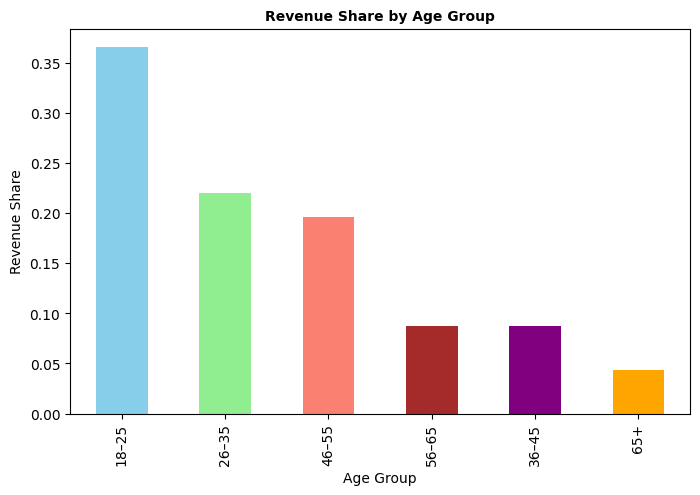

In [ ]:
# Create Age Groups
df['Age_Group'] = pd.cut(
    df['Age'],
    bins=[18,25,35,45,55,65,100],
    labels=['18–25','26–35','36–45','46–55','56–65','65+']
)

age_revenue = (
    df.groupby('Age_Group')['Amount']
      .sum()
      .sort_values(ascending=False)
)

# Revenue share
age_share = age_revenue / age_revenue.sum()

plt.figure(figsize=(8,5))
age_share.plot(kind='bar', color = ['skyblue', 'lightgreen', 'salmon', 'brown', 'purple', 'orange'])
plt.title('Revenue Share by Age Group', fontsize=10, fontdict={'fontweight':'bold'})
plt.ylabel('Revenue Share')
plt.xlabel('Age Group')
plt.show()

Text(0.5, 1.0, 'Age Distribution')

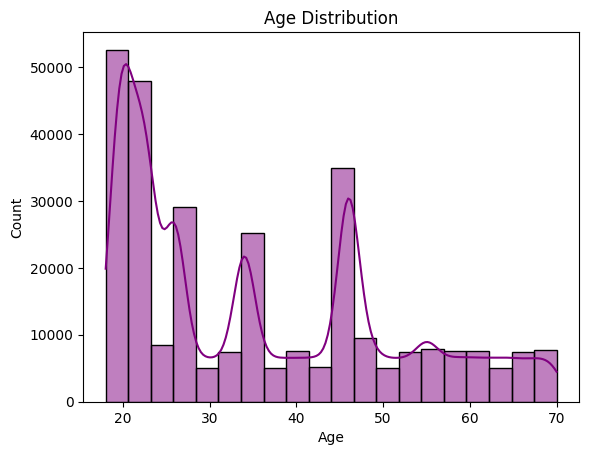

In [110]:
sns.histplot(df['Age'], bins=20, kde=True,color='purple')
plt.title('Age Distribution')

In [112]:
# Filter for delivered orders
delivered_orders = df[df['Order_Status'] == 'Delivered']

# Define age groups
bins = [18, 25, 35, 45, 100]  # Define the age bins
labels = ['18-25', '25-35', '35-45', '46+']  # Define the labels for the groups

# Create a new column for age groups
delivered_orders['Age_Group'] = pd.cut(delivered_orders['Age'], bins=bins, labels=labels, right=False)

# Group by Age Group and calculate total amount and total purchases
age_group_summary = delivered_orders.groupby('Age_Group').agg(
    Total_Amount_Millions=('Amount', 'sum'),
    Total_Purchases_K=('Age_Group', 'count')
).reset_index()

# Convert amount to millions and total purchases to thousands
age_group_summary['Total_Amount_Millions'] = age_group_summary['Total_Amount_Millions'] / 1_000_000
age_group_summary['Total_Purchases_K'] = age_group_summary['Total_Purchases_K'] / 1_000

# Display the summary
age_group_summary = age_group_summary.sort_values(by='Total_Amount_Millions', ascending=False)
age_group_summary

,Age_Group,Total_Amount_Millions,Total_Purchases_K
0,18-25,13.901795,54.510
1,25-35,8.326772,32.756
3,46+,8.198342,32.153
2,35-45,1.995579,7.819


<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">Interpretation of Hypothesis 3 </p>

<p style="font-family:Times New Roman; font-size:18px;">
The results show that revenue contribution is not evenly distributed across age groups.<br>
Younger customer segments generate a disproportionately higher share of total revenue.<br>
This indicates that these segments play a key role in sustaining and growing business performance.
</p>


<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">Business Insight of Hypothesis 3 </p>

<p style="font-family:Times New Roman; font-size:18px;">
Revenue generation is strongly driven by younger customer segments.
<br>
<br>
These customers exhibit higher purchasing activity and contribute a larger share of total revenue compared to older age groups.
<br>
<br>
Targeted engagement of these segments can significantly improve marketing efficiency and revenue growth.
</p>


<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">Recommendations for Stakeholder</p>
<p style="font-family:Times New Roman; font-size:18px;">
1. Focus marketing campaigns on high-spending customers to increase retention and repeat purchases.
<br>
<br>
2. Develop personalized offers, VIP programs, or loyalty incentives to encourage these customers to spend more.
<br>
<br>
3. Monitor high-value customer behavior to anticipate purchasing trends and optimize inventory accordingly.
</p>

<p style="font-family:Times New Roman; font-size:22px;font-weight:bold; color:darkred;">Further Improvements</p>
<p style="font-family:Times New Roman; font-size:18px;">
1. Segment high-value customers by product preference, region, or age group for more precise targeting.
<br>
<br>
2. Combine transactional data with web/app interaction data to better understand high-spender behavior.
<br>
<br>
3. Track changes in cumulative revenue contribution over time to measure impact of loyalty programs or promotions.</p>